# Diabetes Database
Goal: Predict if a person will get diabetes based on diagnostic measures
The datasets consists of several medical predictor variables and one Outcome (Yes or No diabetes). Predictor variables includes the number of pregnancies the patient has had, their Body Mass Index, insulin and glucose level, blood pressure,Diabetes Pedigree (likelihood of diabetes based on family history), age, and so on.

Source: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

<img src='Diabetes.jpeg' width=400 height=400/></a>


# Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb

# You can import TensorFlow, then call the Module Keras from it, whenever you need by tf.keras
import tensorflow as tf

# Or, just import keras:
# from tensorflow import keras

In [32]:
import matplotlib.pyplot as plt

# Data

In [2]:
dataset = pd.read_csv('DiabeticData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.head()

,NumberOfPregnancies,GlucoseConcentration,BloodPressure,SkinThickness,InsulinLevel,BodyMassIndex,DiabetesPedigree,Age,Diabetic
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes


In [4]:
#pd.DataFrame(X)
#pd.DataFrame(y)

# Encoding the Output Data

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Data Analysis

<AxesSubplot:>

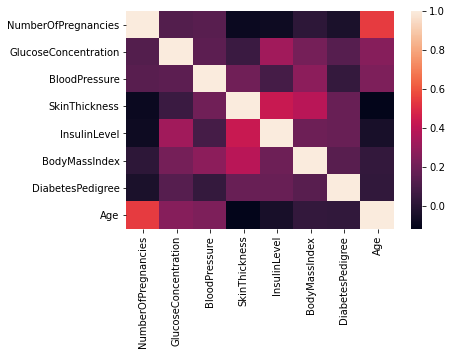

In [5]:
sb.heatmap(dataset.corr())

<AxesSubplot:xlabel='Diabetic', ylabel='Age'>

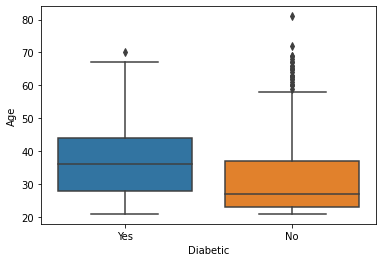

In [6]:
sb.boxplot(x='Diabetic', y='Age', data=dataset)

<AxesSubplot:xlabel='Age', ylabel='Count'>

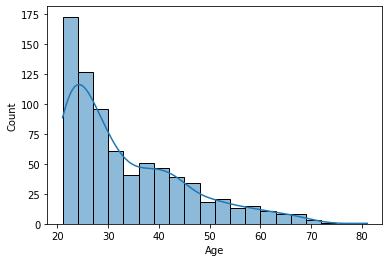

In [7]:
sb.histplot(dataset['Age'], kde=True, bins=20)

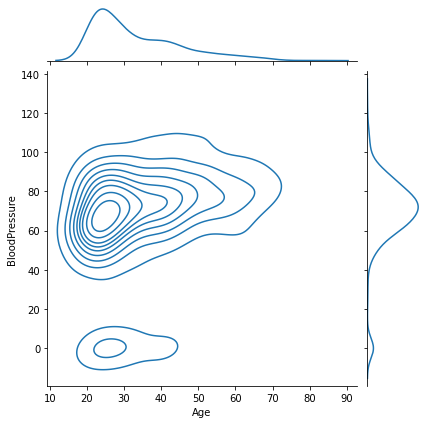

In [8]:
sb.jointplot(x='Age' , y='BloodPressure' , data=dataset, kind='kde')

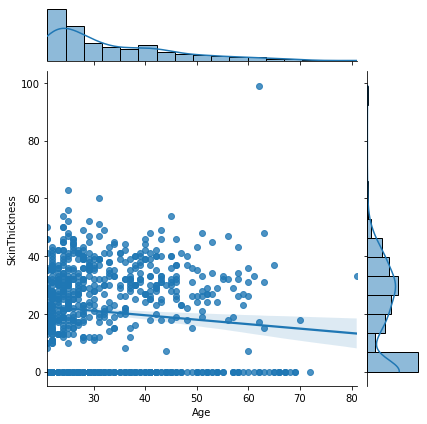

In [9]:
sb.jointplot(x='Age' , y='SkinThickness' , data=dataset, kind='reg')

# Removing Outliers

## Inspectign the data

<AxesSubplot:xlabel='Diabetic', ylabel='GlucoseConcentration'>

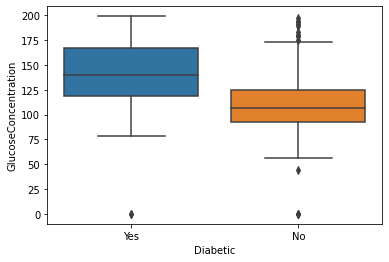

In [37]:
sb.boxplot(x='Diabetic', y='GlucoseConcentration', data=dataset)

## Seperating the Two Groups (Dibetics & Healthy)

In [38]:
Diabetic = dataset[dataset["Diabetic"]=="Yes"]
Healthy=dataset[dataset["Diabetic"]=="No"]

In [39]:
Healthy.shape

(500, 9)

<AxesSubplot:ylabel='GlucoseConcentration'>

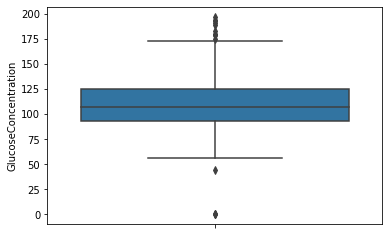

In [40]:
sb.boxplot( y='GlucoseConcentration', data=Healthy)

## Function for Removing any Data outside the Boxplot

In [41]:
def drop_outliers(data, feature):
    iqr = 1.5 * (np.percentile(data[feature], 75) - np.percentile(data[feature], 25))
    data.drop(data[data[feature] > (iqr + np.percentile(data[feature], 75))].index, inplace=True)
    data.drop(data[data[feature] < (np.percentile(data[feature], 25) - iqr)].index, inplace=True)

## Remove Outlier for Each Feature

### Feature 1. GlucoseConcentration

In [42]:
drop_outliers(Diabetic, 'GlucoseConcentration')
drop_outliers(Healthy, 'GlucoseConcentration')

C:\Users\Tree\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Tree\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Tree\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Tree\anaconda3\lib\sit

<AxesSubplot:ylabel='GlucoseConcentration'>

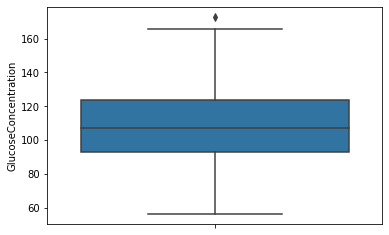

In [43]:
# Just Checking
sb.boxplot( y='GlucoseConcentration', data=Healthy)

### The rest of Features

In [48]:
drop_outliers(Diabetic, 'NumberOfPregnancies')
drop_outliers(Healthy, 'NumberOfPregnancies')

drop_outliers(Diabetic, 'BloodPressure')
drop_outliers(Healthy, 'BloodPressure')

drop_outliers(Diabetic, 'SkinThickness')
drop_outliers(Healthy, 'SkinThickness')

drop_outliers(Diabetic, 'InsulinLevel')
drop_outliers(Healthy, 'InsulinLevel')

drop_outliers(Diabetic, 'BodyMassIndex')
drop_outliers(Healthy, 'BodyMassIndex')

drop_outliers(Diabetic, 'DiabetesPedigree')
drop_outliers(Healthy, 'DiabetesPedigree')

drop_outliers(Diabetic, 'Age')
drop_outliers(Healthy, 'Age')


C:\Users\Tree\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Tree\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Tree\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\Tree\anaconda3\lib\sit

### Putting the clean data from the two groups together

In [49]:
datasetclean=Diabetic.append(Healthy)

In [50]:
datasetclean

,NumberOfPregnancies,GlucoseConcentration,BloodPressure,SkinThickness,InsulinLevel,BodyMassIndex,DiabetesPedigree,Age,Diabetic
0,6,148,72,35,0,33.6,0.627,50,Yes
2,8,183,64,0,0,23.3,0.672,32,Yes
6,3,78,50,32,88,31.0,0.248,26,Yes
11,10,168,74,0,0,38.0,0.537,34,Yes
14,5,166,72,19,175,25.8,0.587,51,Yes
...,...,...,...,...,...,...,...,...,...
758,1,106,76,0,0,37.5,0.197,26,No
760,2,88,58,26,16,28.4,0.766,22,No
764,2,122,70,27,0,36.8,0.340,27,No
765,5,121,72,23,112,26.2,0.245,30,No


### Checkign the Clean Data

<AxesSubplot:xlabel='Diabetic', ylabel='Age'>

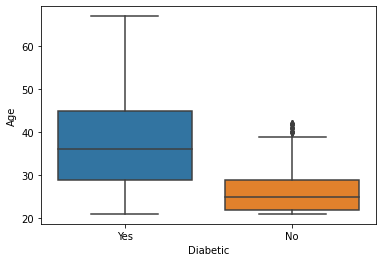

In [51]:
sb.boxplot(x='Diabetic', y='Age', data=datasetclean)

# The cost of Removing Outliers

In [52]:
datasetclean.shape

(558, 9)

In [53]:
# Now, we can decide to use the original data:
#X = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, -1].values

# Or, the clean data

X = datasetclean.iloc[:, :-1].values
y = datasetclean.iloc[:, -1].values

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Splitting the Dataset into the Training set and Test set

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Building the ANN Model

## Initializing the ANN

In [60]:
DModel=tf.keras.models.Sequential()

## Adding the Input Layer

In [61]:
DModel.add(tf.keras.layers.Dense(8,activation='relu'))

## Adding the First Hidden Layer

In [62]:
DModel.add(tf.keras.layers.Dense(16,activation='relu'))

## Adding the Second, Third, ... Hidden Layers

In [63]:
# We only add extra layers if we need to, in order to increase the accuracy;
# we just need to repeat the same line of code, maybe with different or same 
# number of nodes.

#DModel.add(tf.keras.layers.Dense(8,activation='relu'))

## Adding the Output Layer

In [64]:
DModel.add(tf.keras.layers.Dense(2,activation='softmax'))
# Note, you have 3 classes, so, you change this number accordingly.
# You may try differnt activation function; like 'softmax' or 'sigmoid'

## Compiling the ANN

In [65]:
DModel.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

<font color=red> Note: <font color=blue> Here you can try two differnt optimizers algorithms, such as : <br>
    - 'adam'<br>
    - 'sgd' <br>
To calculate Error/loss, you may use any criteria, such as: <br>
    - 'mean_squared_error'<br>
    - 'sparse_categorical_crossentropy'<br>
And, for measuring the accuracy, you can use:<br>
    - 'accuracy'<br>
    
Extra things to know:<br>
Cross entropy is a loss function, used to measure the dissimilarity between the distribution of observed class labels and the predicted probabilities of class membership.<br> 
That is the categorical cross entropy. Sparse means that it does use all the possible classes but some of them. This is useful when you have a lot of classes (like 1000) where softmax would be a very slow function to calculate among all of them. So you basically select some of those 1000 classes and apply the categorical cross entropy.<br>
    
Interested in learning more:<br>
Loss and Loss Functions for Training Deep Learning Neural Networks: <br>
    https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/ <br>
How to Choose Loss Functions When Training Deep Learning Neural Networks:<br>
https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

## Training the ANN

In [66]:
DModel.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6693 - accuracy: 0.5964
Epoch 2/100
14/14 [==============================] - 0s 1ms/step - loss: 0.6137 - accuracy: 0.6861
Epoch 3/100
14/14 [==============================] - 0s 1ms/step - loss: 0.5724 - accuracy: 0.7265
Epoch 4/100
14/14 [==============================] - 0s 1ms/step - loss: 0.5420 - accuracy: 0.7556
Epoch 5/100
14/14 [==============================] - 0s 1ms/step - loss: 0.5150 - accuracy: 0.7735
Epoch 6/100
14/14 [==============================] - 0s 1ms/step - loss: 0.4930 - accuracy: 0.7870
Epoch 7/100
14/14 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.7915
Epoch 8/100
14/14 [==============================] - 0s 1ms/step - loss: 0.4584 - accuracy: 0.7960
Epoch 9/100
14/14 [==============================] - 0s 1ms/step - loss: 0.4455 - accuracy: 0.8049
Epoch 10/100
14/14 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.8117
Epoch 11/

14/14 [==============================] - 0s 1ms/step - loss: 0.3189 - accuracy: 0.8700
Epoch 84/100
14/14 [==============================] - 0s 1ms/step - loss: 0.3183 - accuracy: 0.8632
Epoch 85/100
14/14 [==============================] - 0s 1ms/step - loss: 0.3183 - accuracy: 0.8632
Epoch 86/100
14/14 [==============================] - 0s 1ms/step - loss: 0.3175 - accuracy: 0.8655
Epoch 87/100
14/14 [==============================] - 0s 1ms/step - loss: 0.3170 - accuracy: 0.8677
Epoch 88/100
14/14 [==============================] - 0s 1ms/step - loss: 0.3166 - accuracy: 0.8677
Epoch 89/100
14/14 [==============================] - 0s 1ms/step - loss: 0.3165 - accuracy: 0.8677
Epoch 90/100
14/14 [==============================] - 0s 1ms/step - loss: 0.3159 - accuracy: 0.8677
Epoch 91/100
14/14 [==============================] - 0s 1ms/step - loss: 0.3158 - accuracy: 0.8655
Epoch 92/100
14/14 [==============================] - 0s 1ms/step - loss: 0.3153 - accuracy: 0.8677
Epoch 93/100


## Evaluating the Model

### Checking with a few data

In [67]:
y_pred = DModel.predict(X_test)

# let's just do some quick checking: 
print("The probability of this person become diabetic is", 100*y_pred[43, 1], '%') # the first value in y_pred gives the probabilty
# of not having diabities and the second value (y_pred[43, 1]) gives the probabilty of having diabities. 

print("The actual result", y_test[43])

# Recall, Actual Classes are: 0 (Healthy), 1 (Diabetic)

4/4 [==============================] - 0s 999us/step
The probability of this person become diabetic is 30.333024263381958 %
The actual result 1


### Use built in function

In [68]:
DModel.evaluate(X_test,y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.3322 - accuracy: 0.8214


[0.332180917263031, 0.8214285969734192]

### Calculate Confusion Matrix

In [69]:
# First you need to turn the values of probabilty to 0 & 1.
y_predict=[]
for value in y_pred[:,0]:
    if value>0.5:
        y_predict.append(0)
    else:
        y_predict.append(1)

In [70]:
#y_predict

In [71]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predict)
print(cm)
print("Your Model Accuracy is=", accuracy_score(y_test, y_predict)*100, "%")

[[65  8]
 [12 27]]
Your Model Accuracy is= 82.14285714285714 %


### History of Accuracy and Loss

In [72]:
HistoryTrainTest=DModel.fit(X, y, validation_split=0.2, epochs=100, batch_size=32, verbose=0)

In [73]:
print(HistoryTrainTest.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


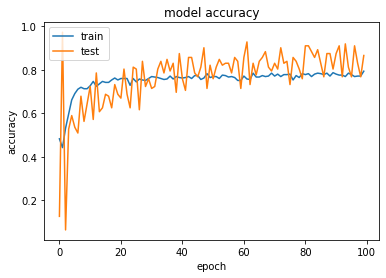

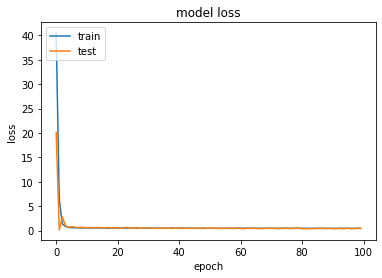

In [74]:
plt.plot(HistoryTrainTest.history['accuracy'])
plt.plot(HistoryTrainTest.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(HistoryTrainTest.history['loss'])
plt.plot(HistoryTrainTest.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Use the Model for a New Person

In [75]:
# Let's say, a new person go to a clinic, they do her medical measurements, and here is the prediction by the model, whether 
# she is at onset of dibetes or okay! 
NewPersonMedicalTest=[[0,118,84,47,230,45.8,0.551,31]]
PredictHealth=DModel.predict(sc.transform(NewPersonMedicalTest))

1/1 [==============================] - 0s 24ms/step


In [76]:
PredictHealth # [Probability of Healthy, Probability of Diabetic]

array([[0.9726523 , 0.02734762]], dtype=float32)

In [77]:
# Let's make the code nicer, and easier for a person to understand 
if PredictHealth[:,0]>0.5:
    print("Congratulation, You are healthy! But Don't think it is forever, Try to stay healthy!")
else:
    print("Sorry, you will become diabetic; but don't lose hope, eat healthy and excersie!")

Congratulation, You are healthy! But Don't think it is forever, Try to stay healthy!


##### End